In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predicting-Heart-Disease-master/dataset.csv')
df.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


The dataset consists of 779 individuals data. There are 15 columns in the dataset, however the first column name is not a good parameter as far as machine learning is considered so, there are effectively 14 columns.

Age : displays the age of the individual.

Sex : displays the gender of the individual using the following format : 1 = male 0 = female.

Chest-pain type : displays the type of chest-pain experienced by the individual using the following format : 1 = typical angina 2 = atypical angina 3 = non - anginal pain 4 = asymptotic

Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)

Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)

Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)

Resting ECG : 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

Max heart rate achieved : displays the max heart rate achieved by an individual.

Exercise induced angina : 1 = yes 0 = no
ST depression induced by exercise relative to rest : displays the value which is integer or float.

Peak exercise ST segment : 1 = upsloping 2 = flat 3 = downsloping

Number of major vessels (0-3) colored by flourosopy : displays the value as integer or float.

Thal : displays the thalassemia : 3 = normal 6 = fixed defect 7 = reversable defect

Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not : 0 = absence 1,2,3,4 = present

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

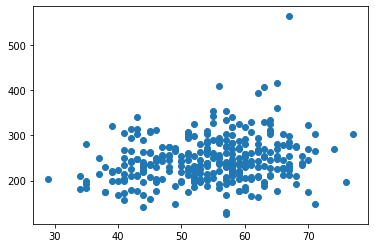

In [8]:
plt.scatter(df.age, df['chol'])

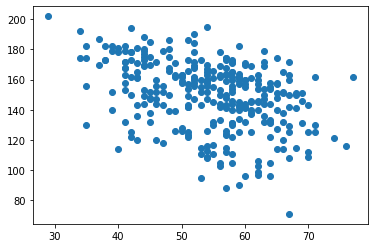

In [9]:
plt.scatter(df.age, df.thalach)

In [10]:
X= df.drop('target', axis=1)
Y= df.target

In [11]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state= 34)

In [13]:
print(X_train,"\n")
print(Y_train,"\n")
print(X_test,"\n")
print(Y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
117   56    1   3       120   193    0        0      162      0      1.9   
142   42    0   2       120   209    0        1      173      0      0.0   
232   55    1   0       160   289    0        0      145      1      0.8   
33    54    1   2       125   273    0        0      152      0      0.5   
62    52    1   3       118   186    0        0      190      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
139   64    1   0       128   263    0        1      105      1      0.2   
35    46    0   2       142   177    0        0      160      1      1.4   
85    67    0   2       115   564    0        0      160      0      1.6   
246   56    0   0       134   409    0        0      150      1      1.9   
122   41    0   2       112   268    0        0      172      1      0.0   

     slope  ca  thal  
117      1   0     3  
142      1   0     2  
232      1   1    

##K-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=21)#, p=4)#, algorithm='brute'#, metric="minkowski")
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=21)

In [15]:
knn.predict(X_test)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [16]:
knn.score(X_test, Y_test)

0.7868852459016393

##Support Vector Machine

In [28]:
from sklearn.svm import SVC
svc= SVC(random_state=34)
svc.fit(X_train, Y_train)

SVC(random_state=34)

In [29]:
svc.score(X_test, Y_test)

0.7049180327868853

##Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [43]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [44]:
lr.score(X_test, Y_test)

0.8524590163934426

## Use of Tensorflow and Keras library for making layers for Artificial Neural Network

In [45]:
from tensorflow import keras

In [53]:
model = keras.Sequential([keras.layers.Dense(300,input_shape=(13,), activation="relu"),
                          keras.layers.Dense(30, activation="relu"),
                          keras.layers.Dense(1, activation="sigmoid")])

In [54]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])

In [96]:

model.fit(X_train, Y_train, epochs=200, batch_size=24, verbose=2)

Epoch 1/200
11/11 - 0s - loss: 0.0910 - accuracy: 0.9587 - 30ms/epoch - 3ms/step
Epoch 2/200
11/11 - 0s - loss: 0.0891 - accuracy: 0.9669 - 27ms/epoch - 2ms/step
Epoch 3/200
11/11 - 0s - loss: 0.0789 - accuracy: 0.9711 - 30ms/epoch - 3ms/step
Epoch 4/200
11/11 - 0s - loss: 0.0800 - accuracy: 0.9628 - 29ms/epoch - 3ms/step
Epoch 5/200
11/11 - 0s - loss: 0.2283 - accuracy: 0.9132 - 30ms/epoch - 3ms/step
Epoch 6/200
11/11 - 0s - loss: 0.1874 - accuracy: 0.9132 - 30ms/epoch - 3ms/step
Epoch 7/200
11/11 - 0s - loss: 0.1443 - accuracy: 0.9504 - 30ms/epoch - 3ms/step
Epoch 8/200
11/11 - 0s - loss: 0.0965 - accuracy: 0.9711 - 29ms/epoch - 3ms/step
Epoch 9/200
11/11 - 0s - loss: 0.0930 - accuracy: 0.9628 - 29ms/epoch - 3ms/step
Epoch 10/200
11/11 - 0s - loss: 0.0756 - accuracy: 0.9711 - 35ms/epoch - 3ms/step
Epoch 11/200
11/11 - 0s - loss: 0.0822 - accuracy: 0.9628 - 31ms/epoch - 3ms/step
Epoch 12/200
11/11 - 0s - loss: 0.0790 - accuracy: 0.9628 - 29ms/epoch - 3ms/step
Epoch 13/200
11/11 - 0s -

In [97]:
model.evaluate(X_test, y_pred)

2/2 [==============================] - 0s 7ms/step - loss: 0.3337 - accuracy: 0.9344


[0.3337063491344452, 0.9344262480735779]

Dataset is very much less. We evaluated 93% accuracy with the help of **ANN** Module and **Logistic Regression** which is Machine Learning algorithm. 